![](https://www.pata.org/wp-content/uploads/2014/09/TripAdvisor_Logo-300x119.png)
# Predict TripAdvisor Rating
## В этом соревновании нам предстоит предсказать рейтинг ресторана в TripAdvisor
**По ходу задачи:**
* Прокачаем работу с pandas
* Научимся работать с Kaggle Notebooks
* Поймем как делать предобработку различных данных
* Научимся работать с пропущенными данными (Nan)
* Познакомимся с различными видами кодирования признаков
* Немного попробуем [Feature Engineering](https://ru.wikipedia.org/wiki/Конструирование_признаков) (генерировать новые признаки)
* И совсем немного затронем ML
* И многое другое...   



### И самое важное, все это вы сможете сделать самостоятельно!

*Этот Ноутбук являетсся Примером/Шаблоном к этому соревнованию (Baseline) и не служит готовым решением!*   
Вы можете использовать его как основу для построения своего решения.

> что такое baseline решение, зачем оно нужно и почему предоставлять baseline к соревнованию стало важным стандартом на kaggle и других площадках.   
**baseline** создается больше как шаблон, где можно посмотреть как происходит обращение с входящими данными и что нужно получить на выходе. При этом МЛ начинка может быть достаточно простой, просто для примера. Это помогает быстрее приступить к самому МЛ, а не тратить ценное время на чисто инженерные задачи. 
Также baseline являеться хорошей опорной точкой по метрике. Если твое решение хуже baseline - ты явно делаешь что-то не то и стоит попробовать другой путь) 

В контексте нашего соревнования baseline идет с небольшими примерами того, что можно делать с данными, и с инструкцией, что делать дальше, чтобы улучшить результат.  Вообще готовым решением это сложно назвать, так как используются всего 2 самых простых признака (а остальные исключаются).

# import

In [425]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from datetime import datetime
from datetime import timedelta

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sf-dst-restaurant-rating/sample_submission.csv
/kaggle/input/sf-dst-restaurant-rating/main_task.csv
/kaggle/input/sf-dst-restaurant-rating/kaggle_task.csv


In [426]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [427]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [428]:
DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')

In [429]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
Restaurant_id        40000 non-null object
City                 40000 non-null object
Cuisine Style        30717 non-null object
Ranking              40000 non-null float64
Rating               40000 non-null float64
Price Range          26114 non-null object
Number of Reviews    37457 non-null float64
Reviews              40000 non-null object
URL_TA               40000 non-null object
ID_TA                40000 non-null object
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [430]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [431]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
Restaurant_id        10000 non-null object
City                 10000 non-null object
Cuisine Style        7693 non-null object
Ranking              10000 non-null float64
Price Range          6525 non-null object
Number of Reviews    9343 non-null float64
Reviews              9998 non-null object
URL_TA               10000 non-null object
ID_TA                10000 non-null object
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [432]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [433]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [434]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Restaurant_id    10000 non-null object
Rating           10000 non-null float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [435]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [436]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [437]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
6798,id_6798,Paris,NaN,7396.0,NaN,2.0,"[[], []]",/Restaurant_Review-g187147-d12657812-Reviews-I...,d12657812,0,0.0
40038,id_2526,London,"['Indian', 'Asian', 'Vegetarian Friendly', 'Ve...",2531.0,$$ - $$$,714.0,"[['A nice tasty curry', 'Yummy Indian food'], ...",/Restaurant_Review-g186338-d730318-Reviews-Mal...,d730318,1,4.0
1037,id_1037,London,"['Asian', 'Thai', 'Vegetarian Friendly', 'Vega...",2470.0,$$ - $$$,309.0,"[['Very nice Thai food', 'Great authentic Thai...",/Restaurant_Review-g186338-d1436504-Reviews-Ro...,d1436504,0,0.0
27372,id_3532,Prague,"['Czech', 'Central European', 'European']",3540.0,$$ - $$$,49.0,"[['Tasty but not enough', 'Nice Czech fast-foo...",/Restaurant_Review-g274707-d4769559-Reviews-Po...,d4769559,1,3.5
4542,id_4542,London,"['Turkish', 'Mediterranean', 'Middle Eastern',...",12228.0,$$ - $$$,32.0,"[['Yum', 'Spacious airy Turkish Restaurant tha...",/Restaurant_Review-g186338-d10792806-Reviews-K...,d10792806,0,0.0


Как видим, большинство признаков у нас требует очистки и предварительной обработки.

# Cleaning and Prepping Data
Обычно данные содержат в себе кучу мусора, который необходимо почистить, для того чтобы привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.   
![](https://analyticsindiamag.com/wp-content/uploads/2018/01/data-cleaning.png)

## 1. Обработка NAN 
У наличия пропусков могут быть разные причины, но пропуски нужно либо заполнить, либо исключить из набора полностью. Но с пропусками нужно быть внимательным, **даже отсутствие информации может быть важным признаком!**   
По этому перед обработкой NAN лучше вынести информацию о наличии пропуска как отдельный признак 

In [438]:
# Для примера я возьму столбец Number of Reviews
data['Number_of_Reviews_isNAN'] = pd.isna(data['Number of Reviews']).astype('uint8')
data['Cuisine_Style_isNAN'] = pd.isna(data['Cuisine Style']).astype('uint8')
data['Price_Range_isNAN'] = pd.isna(data['Price Range']).astype('uint8')
data['Reviews_isNAN'] = pd.isna(data['Reviews']).astype('uint8')

In [439]:
data['Number_of_Reviews_isNAN'].value_counts()

0    46800
1     3200
Name: Number_of_Reviews_isNAN, dtype: int64

In [440]:
# Далее заполняем пропуски 0, вы можете попробовать заполнением средним или средним по городу и тд...
data['Number of Reviews'].fillna(0, inplace=True)

### 2. Обработка признаков
Для начала посмотрим какие признаки у нас могут быть категориальными.

In [441]:
data.nunique(dropna=False)

Restaurant_id              13094
City                          31
Cuisine Style              10732
Ranking                    12975
Price Range                    4
Number of Reviews           1574
Reviews                    41858
URL_TA                     49963
ID_TA                      49963
sample                         2
Rating                        10
Number_of_Reviews_isNAN        2
Cuisine_Style_isNAN            2
Price_Range_isNAN              2
Reviews_isNAN                  2
dtype: int64

In [442]:
# для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
#data = pd.get_dummies(data, columns=[ 'City',], dummy_na=True)
dummies = pd.get_dummies(data['City'])
data = pd.concat([data,dummies],axis=1)

In [443]:
data.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,...,Munich,Oporto,Oslo,Paris,Prague,Rome,Stockholm,Vienna,Warsaw,Zurich
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,...,0,0,0,1,0,0,0,0,0,0
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,...,0,0,0,0,0,0,0,0,0,0
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,...,0,0,0,0,0,0,0,0,0,0
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,...,0,0,0,0,0,0,0,0,0,0
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,...,0,0,0,0,0,0,0,0,0,0


#### Возьмем следующий признак "Price Range".

In [445]:
data['Price Range'].value_counts()

$$ - $$$    23041
$            7816
$$$$         1782
Name: Price Range, dtype: int64

In [446]:
# Заменим категориальный признак 'Price Range' на цифровой, заменив на 1,2,3. Пропуски заменим средним значением 2
data['price_range_digit'] = data['Price Range'].apply(lambda x: 2 if pd.isnull(x) else 1 if x=='$' else 2 if x=='$$ - $$$' else 3 if x=='$$$$' else 0)

**Reviews**

In [449]:
# Достанем из Reviews разницу в публикации двух последних отзывов
def get_timedelta (cell):
    from datetime import datetime
    from datetime import timedelta

    
    dates = cell.split('], [')
    
    date = dates[-1].strip("'[]").split(', ')
    
    date1 = date[0].strip("'")
    date2 = date[-1].strip("'")
    
    if date != 0 and len(date)>1:
        time_delta = datetime.strptime(date1,'%m/%d/%Y') - datetime.strptime(date2,'%m/%d/%Y')
        return time_delta/timedelta(days = 1)
    else:
        return 0

In [ ]:
data['time_delta'] = data.Reviews.apply(lambda x: get_timedelta(x))

**Number of Reviews**

In [382]:
# Заполним нулями наши пропуски в количестве отзывов. 
# Скорее всего, там отсутствуют отзывы и этот факт может быть важным и влиять на результат

data['Number of Reviews'] = data['Number of Reviews'].fillna(0)

**Cuisine Style**

In [383]:
#Превратим в список предтставленные данные о количестве кухонь в каждом ресторане
def cuisine_to_list (cell):
    cuisine_list = []
    if pd.isna(cell) != True:
        for ciusine in cell.split(', '):
            cuisine_list.append(ciusine.strip("'[]"))
    else:
        return 0
    return cuisine_list

In [384]:
data['cuisine_style'] = data['Cuisine Style'].apply(lambda x: cuisine_to_list(x))

In [385]:
# Создадим колонку с количеством кухонь, представленных в каждом ресторане
        
data['cuisine_amount'] = data['cuisine_style'].apply(lambda x: len(x) if x!=0 else 0)     

In [386]:
# Создадим список из всех типов кухонь, представленных в датасете:
cuisine_list = set()
for cuisines in data['cuisine_style']:
    if cuisines != 0:
        for cuisine in cuisines:
            cuisine_list.add(cuisine)
len(cuisine_list)

125

In [387]:
# Создадим dummy-переменные из кухонь. Будем сравнивать наличие кухни в ресторане из списка выше
for cuisine in cuisine_list:
    data[cuisine] = data['cuisine_style'].apply(lambda x: 0 if x==0 else 1 if cuisine in x else 0)

In [388]:
# Заполним пропущенные значиение из cuisine styles самыми популярными блюдами из того же города:

cities = data.groupby('City').sum().iloc[:,-125:] #новый датафрейм с городами и кухнями

cities_df = cities.idxmax(axis=1) # DataFrame с самой популярной кухней в городе

cities_dict = dict(cities_df) # Словарь с самой популярной кухней по городам



In [389]:
data['cuisine_fill'] = data.City.map(cities_dict) # Новая колонка с самой популярной кухней в городе

data['Cuisine Style'] = data['Cuisine Style'].fillna(data.cuisine_fill) # Заполним nan значения из колонки выше

#Drop cuisine_fill, нам он не нужен больше
data = data.drop('cuisine_fill',axis=1)

# Заполням нули популярными кухнями в городе в колонке cuisine_style 
data['cuisine_style'] = data['Cuisine Style'].apply(lambda x: cuisine_to_list(x))

# Создадим dummy-переменные из кухонь еще раз с учетом полученных данных
for cuisine in cuisine_list:
    data[cuisine] = data['cuisine_style'].apply(lambda x: 0 if x==0 else 1 if cuisine in x else 0)

# EDA 
[Exploratory Data Analysis](https://ru.wikipedia.org/wiki/Разведочный_анализ_данных) - Анализ данных
На этом этапе мы строим графики, ищем закономерности, аномалии, выбросы или связи между признаками.
В общем цель этого этапа понять, что эти данные могут нам дать и как признаки могут быть взаимосвязаны между собой.
Понимание изначальных признаков позволит сгенерировать новые, более сильные и, тем самым, сделать нашу модель лучше.
![](https://miro.medium.com/max/2598/1*RXdMb7Uk6mGqWqPguHULaQ.png)

### Посмотрим распределение признака

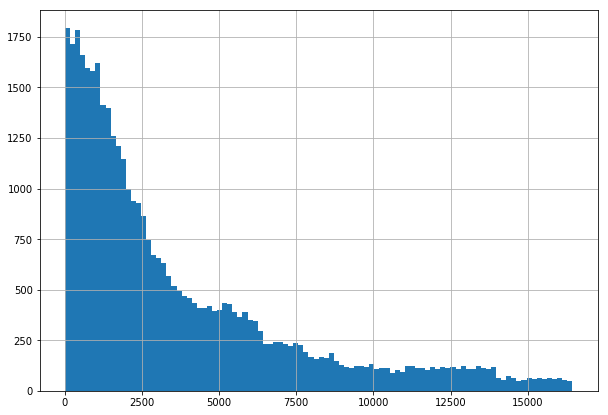

In [390]:
plt.rcParams['figure.figsize'] = (10,7)
df_train['Ranking'].hist(bins=100)

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

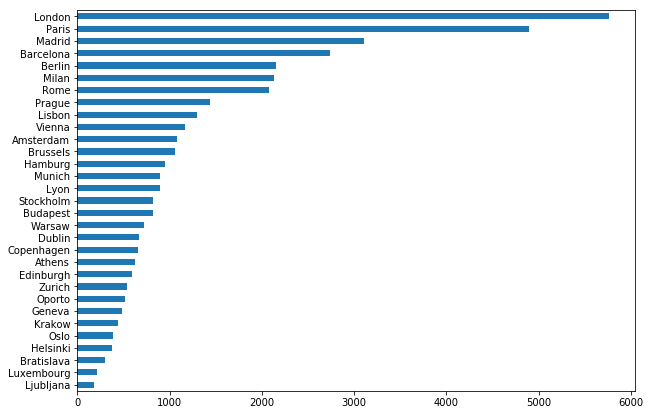

In [391]:
df_train['City'].value_counts(ascending=True).plot(kind='barh')

А кто-то говорил, что французы любят поесть=) Посмотрим, как изменится распределение в большом городе:

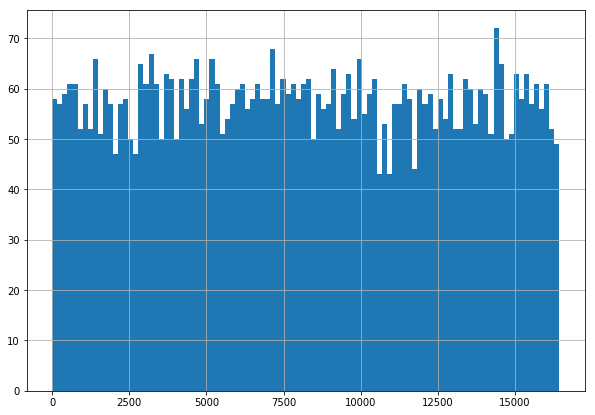

In [392]:
df_train['Ranking'][df_train['City'] =='London'].hist(bins=100)

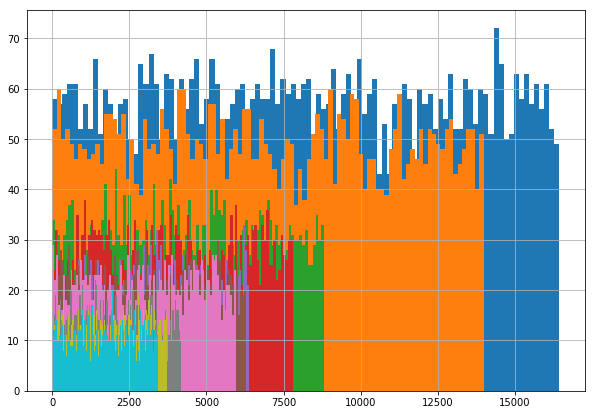

In [393]:
# посмотрим на топ 10 городов
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение.

>Подумайте как из этого можно сделать признак для вашей модели. Я покажу вам пример, как визуализация помогает находить взаимосвязи. А далее действуйте без подсказок =) 


In [394]:
# Так как Ranking зависит от города, имеет смысл нормализовать Ranking относительно города.
data_count = data.City.value_counts()
data['quantity'] = data['City'].apply(lambda x: data_count[x])


In [395]:
# Центрируем
city_ranking_mean = data.groupby('City')['Ranking'].mean()
data['ranking_centered'] = data['Ranking'] - data['City'].apply(lambda x: city_ranking_mean[x])


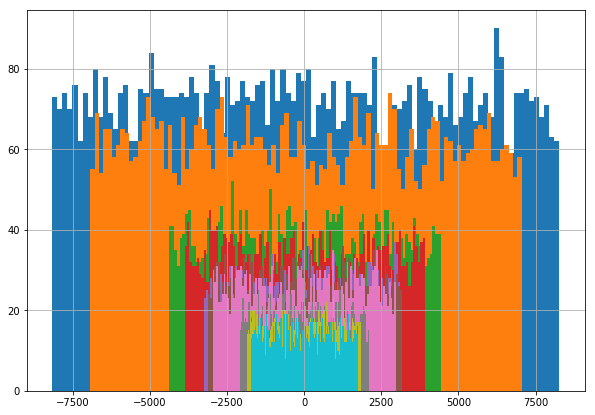

In [396]:
# посмотрим на топ 10 городов после центрирования
for x in (data['City'].value_counts())[0:10].index:
    data['ranking_centered'][data['City'] == x].hist(bins=100)
plt.show()

In [397]:
# Нормализуем

city_lenghs = {}
for city in data_count.index:
    city_lenghs[city] = np.linalg.norm(data[data['City'] == city]['ranking_centered'])


data['ranking_normalized'] = data['ranking_centered']/data['City'].apply(lambda x: city_lenghs[x])


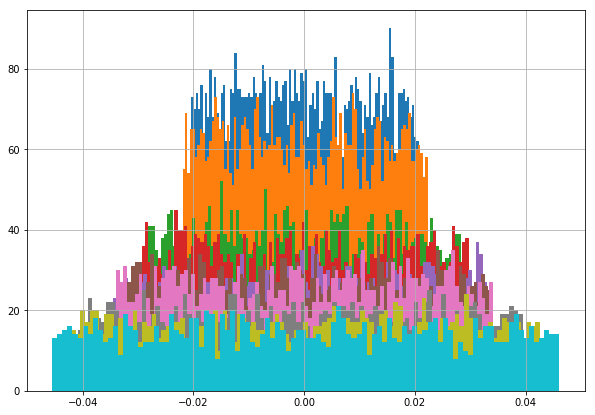

In [398]:
# После нормализации
for x in (data['City'].value_counts())[0:10].index:
    data['ranking_normalized'][data['City'] == x].hist(bins=100)
plt.show()

In [399]:
# Вычислим отношение ранга ресторана к количеству ресторанов в городе.
data['relative_rank'] = data['Ranking']/data['quantity']

In [400]:
# Вычислим количество отзывов по городам, добавим в датасет

reviews_by_city = data.groupby('City')['Number of Reviews'].sum()
data['reviews_by_city'] = data['City'].apply(lambda x: reviews_by_city[x])

### Посмотрим распределение целевой переменной

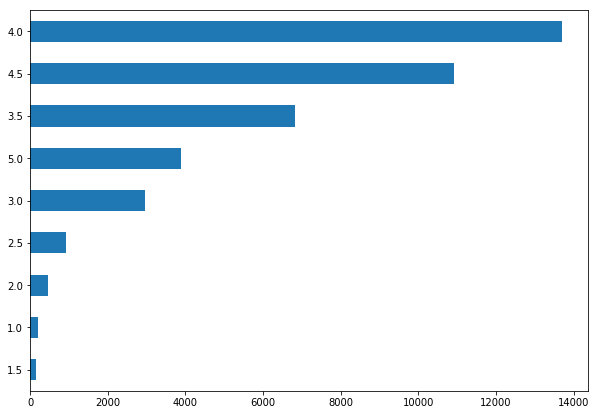

In [401]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

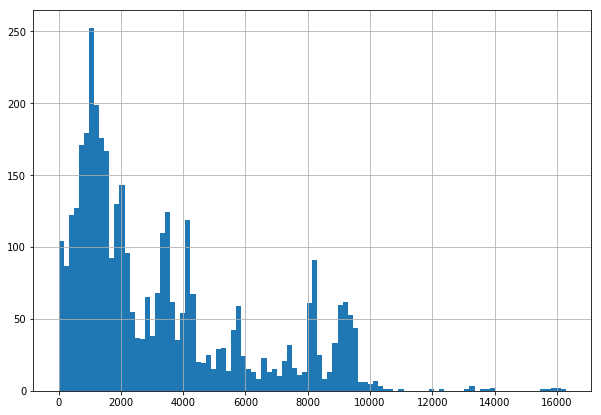

In [402]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

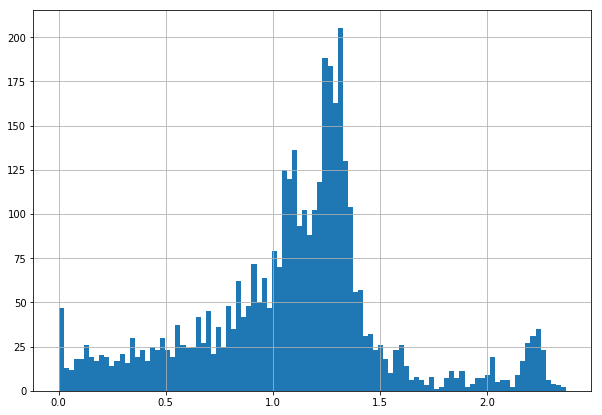

In [403]:
data['relative_rank'][data['Rating'] == 5].hist(bins=100)

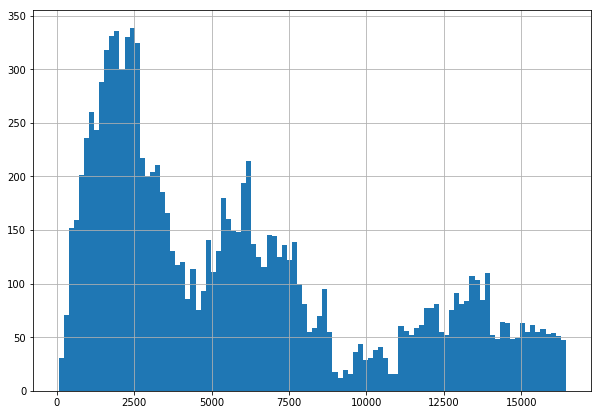

In [404]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

### И один из моих любимых - [корреляция признаков](https://ru.wikipedia.org/wiki/Корреляция)
На этом графике уже сейчас вы сможете заметить, как признаки связаны между собой и с целевой переменной.

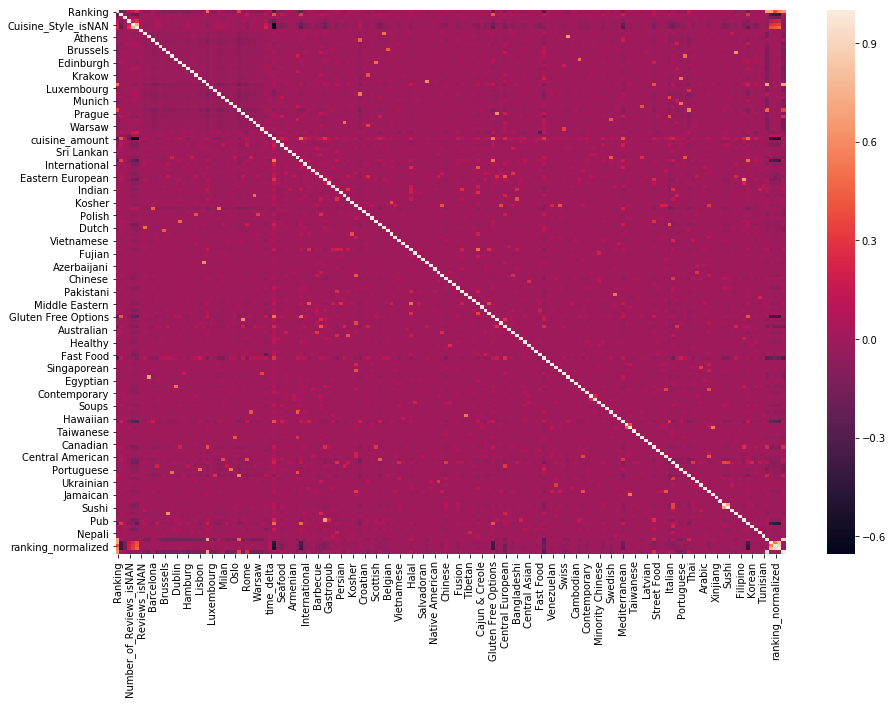

In [405]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.drop(['sample'], axis=1).corr(),)

Вообще благодаря визуализации в этом датасете можно узнать много интересных фактов, например:
* где больше Пицерий в Мадриде или Лондоне?
* в каком городе кухня ресторанов более разнообразна?

придумайте свои вопрос и найдите на него ответ в данных)

# Data Preprocessing
Теперь, для удобства и воспроизводимости кода, завернем всю обработку в одну большую функцию.

In [406]:
# на всякий случай, заново подгружаем данные
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'/kaggle_task.csv')
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


In [407]:
def preproc_data(df_input):
    '''includes several functions to pre-process the predictor data.'''
    
    data = df_input.copy()
    
    # ################### 1. Предобработка ############################################################## 
    # убираем не нужные для модели признаки
    data.drop(['Restaurant_id','ID_TA','URL_TA'], axis = 1, inplace=True)
    
    
    # ################### 2. NAN ############################################################## 
    # Далее заполняем пропуски, вы можете попробовать заполнением средним или средним по городу и тд...
    data['Number_of_Reviews_isNAN'] = pd.isna(data['Number of Reviews']).astype('uint8')
    data['Cuisine_Style_isNAN'] = pd.isna(data['Cuisine Style']).astype('uint8')
    data['Price_Range_isNAN'] = pd.isna(data['Price Range']).astype('uint8')
    data['Reviews_isNAN'] = pd.isna(data['Reviews']).astype('uint8')
    
    data['Number of Reviews'].fillna(0, inplace=True)
    
    # тут ваш код по обработке NAN
    data.Reviews.fillna('[[], []]',inplace = True)
    
    
    # ################### 3. Encoding ############################################################## 
    # для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
    dummies = pd.get_dummies(data['City'])
    data = pd.concat([data,dummies],axis=1)
    
    # Заменим категориальный признак 'Price Range' на цифровой, заменив на 1,2,3. Пропуски заменим средним значением 2
    data['price_range_digit'] = data['Price Range'].apply(lambda x: 2 if pd.isnull(x) else 1 if x=='$' else 2 if x=='$$ - $$$' else 3 if x=='$$$$' else 0)
    
    # Превратим в список предтставленные данные о количестве кухонь в каждом ресторане
    def cuisine_to_list (cell):
        cuisine_list = []
        if pd.isna(cell) != True:
            for ciusine in cell.split(', '):
                cuisine_list.append(ciusine.strip("'[]"))
        else:
            return 0
        return cuisine_list
    
    data['cuisine_style'] = data['Cuisine Style'].apply(lambda x: cuisine_to_list(x))
    
    # Создадим список из всех типов кухонь, представленных в датасете:
    cuisine_list = set()
    for cuisines in data['cuisine_style']:
        if cuisines != 0:
            for cuisine in cuisines:
                cuisine_list.add(cuisine)
    len(cuisine_list)
    
    # Создадим dummy-переменные из кухонь. Будем сравнивать наличие кухни в ресторане из списка выше
    for cuisine in cuisine_list:
        data[cuisine] = data['cuisine_style'].apply(lambda x: 0 if x==0 else 1 if cuisine in x else 0)
    
    # Заполним пропущенные значиения из cuisine styles самыми популярными блюдами из того же города:

    cities = data.groupby('City').sum().iloc[:,-125:] #новый датафрейм с городами и кухнями

    cities_df = cities.idxmax(axis=1) # DataFrame с самой популярной кухней в городе

    # Словарь с самой популярной кухней по городам
    cities_dict = dict(cities_df) 
    
    # Новая колонка с самой популярной кухней в городе
    data['cuisine_fill'] = data.City.map(cities_dict) 
    
    # Заполним nan значения из колонки выше
    data['Cuisine Style'] = data['Cuisine Style'].fillna(data.cuisine_fill) 

    #Drop cuisine_fill, нам он не нужен больше
    data = data.drop('cuisine_fill',axis=1)

    # Заполням нули популярными кухнями в городе в колонке cuisine_style 
    data['cuisine_style'] = data['Cuisine Style'].apply(lambda x: cuisine_to_list(x))

    # Создадим dummy-переменные из кухонь еще раз с учетом полученных данных
    for cuisine in cuisine_list:
        data[cuisine] = data['cuisine_style'].apply(lambda x: 0 if x==0 else 1 if cuisine in x else 0)
    
    
    # ################### 4. Feature Engineering ####################################################
    
    # Добавим в наш датасет количество ресторанов по городам
    df_count = data.City.value_counts()
    data['quantity'] = data['City'].apply(lambda x: df_count[x])
    
    # Создадим колонку с количеством кухонь, представленных в каждом ресторане
    data['cuisine_amount'] = data['cuisine_style'].apply(lambda x: len(x) if x!=0 else 0) 
    
    # Достанем из Reviews разницу в публикации двух последних отзывов
    def get_timedelta (cell):
    
        from datetime import datetime
        from datetime import timedelta
    
        dates = cell.split('], [')
    
        date = dates[-1].strip("'[]").split(', ')
    
        date1 = date[0].strip("'")
        date2 = date[-1].strip("'")
    
        if date != 0 and len(date)>1:
            time_delta = datetime.strptime(date1,'%m/%d/%Y') - datetime.strptime(date2,'%m/%d/%Y')
            return time_delta/timedelta(days = 1)
        else:
            return 0
    
    
    data['time_delta'] = data.Reviews.apply(lambda x: get_timedelta(x))
    
    # Так как Ranking зависит от размера города, имеет смысл нормализовать Ranking относительно размера города.
    data_count = data.City.value_counts()
    data['quantity'] = data['City'].apply(lambda x: data_count[x])
    
    # Центрируем
    city_ranking_mean = data.groupby('City')['Ranking'].mean()
    data['ranking_centered'] = data['Ranking'] - data['City'].apply(lambda x: city_ranking_mean[x])

    # Нормализуем
    city_lenghs = {}
    for city in data_count.index:
        city_lenghs[city] = np.linalg.norm(data[data['City'] == city]['ranking_centered'])

    data['ranking_normalized'] = data['ranking_centered']/data['City'].apply(lambda x: city_lenghs[x])
    
    # Вычислим отношение ранга ресторана к количеству ресторанов в городе.
    data['relative_rank'] = data['Ranking']/data['quantity']
    
    # Вычислим количество отзывов по городам, добавим в датасет
    reviews_by_city = data.groupby('City')['Number of Reviews'].sum()
    data['reviews_by_city'] = data['City'].apply(lambda x: reviews_by_city[x])
 
    # ################### 5. Clean #################################################### 
    # убираем признаки которые еще не успели обработать, 
    # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
    object_columns = [s for s in data.columns if data[s].dtypes == 'object']
    data.drop(object_columns, axis = 1, inplace=True)
    
    return data

>По хорошему, можно было бы перевести эту большую функцию в класс и разбить на подфункции (согласно ООП). 

#### Запускаем и проверяем что получилось

In [408]:
df_preproc = preproc_data(data)
df_preproc.sample(10)

,Ranking,Number of Reviews,sample,Rating,Number_of_Reviews_isNAN,Cuisine_Style_isNAN,Price_Range_isNAN,Reviews_isNAN,Amsterdam,Athens,...,Cafe,Nepali,Tunisian,quantity,cuisine_amount,time_delta,ranking_centered,ranking_normalized,relative_rank,reviews_by_city
4322,1115.0,138.0,0,0.0,0,0,0,0,0,0,...,0,0,0,1186,5,10.0,-260.409781,-0.009540,0.940135,48853.0
10913,2780.0,0.0,1,4.0,1,1,1,0,1,0,...,0,0,0,1372,1,0.0,1188.410350,0.034173,2.026239,193814.0
18635,2406.0,866.0,1,3.5,0,0,0,0,0,0,...,0,0,0,2694,2,120.0,-700.027840,-0.007497,0.893096,431350.0
6717,2637.0,88.0,0,0.0,0,0,0,0,0,0,...,0,0,0,3813,5,9.0,-1751.516391,-0.011223,0.691581,357185.0
48157,1820.0,228.0,1,4.0,0,0,0,0,0,0,...,1,0,0,2589,7,5.0,-1150.733102,-0.013174,0.702974,728235.0
43082,308.0,241.0,1,4.0,0,0,0,0,0,1,...,0,0,0,776,3,26.0,-572.213918,-0.041362,0.396907,67765.0
42198,1460.0,389.0,1,4.0,0,0,0,0,0,0,...,0,0,0,3395,5,27.0,-2419.422680,-0.018338,0.430044,429437.0
23033,2063.0,8.0,1,3.5,0,0,0,0,0,0,...,0,0,0,1021,2,137.0,843.938296,0.037564,2.020568,148366.0
24126,9831.0,9.0,1,4.0,0,1,1,0,0,0,...,0,0,0,7193,1,25.0,1661.292646,0.004147,1.366745,933770.0
5300,498.0,70.0,0,0.0,0,0,0,0,0,0,...,1,0,0,1443,6,1.0,-1213.275814,-0.032279,0.345114,106709.0


In [409]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 172 entries, Ranking to reviews_by_city
dtypes: float64(8), int64(129), uint8(35)
memory usage: 53.9 MB


In [410]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [411]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [412]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 171), (40000, 171), (40000, 170), (32000, 170), (8000, 170))

# Model 
Сам ML

In [413]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [414]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [415]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   21.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [416]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.20247625


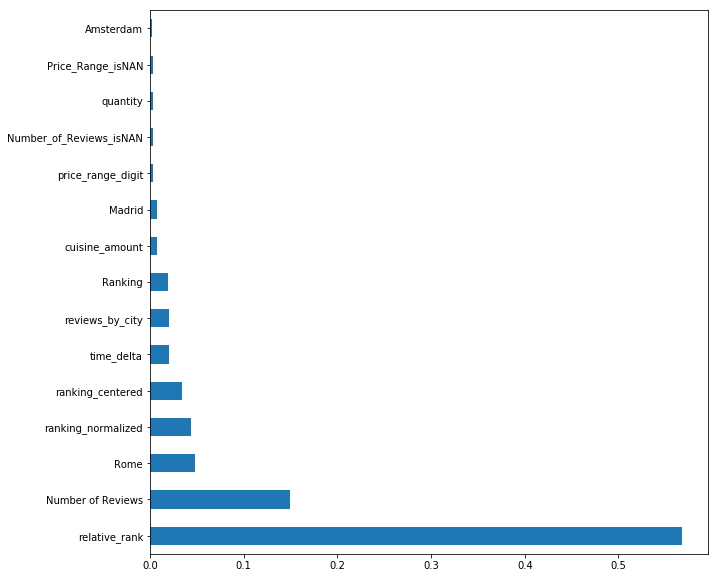

In [417]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [418]:
test_data.sample(10)

,Ranking,Number of Reviews,Rating,Number_of_Reviews_isNAN,Cuisine_Style_isNAN,Price_Range_isNAN,Reviews_isNAN,Amsterdam,Athens,Barcelona,...,Cafe,Nepali,Tunisian,quantity,cuisine_amount,time_delta,ranking_centered,ranking_normalized,relative_rank,reviews_by_city
1420,6710.0,7.0,0.0,0,0,0,0,0,0,0,...,0,0,0,3813,2,-11.0,2321.483609,0.014875,1.759769,357185.0
7993,1468.0,7.0,0.0,0,1,1,0,0,0,0,...,0,0,0,1145,1,411.0,97.702183,0.003588,1.282096,82386.0
416,1453.0,44.0,0.0,0,0,0,0,0,0,0,...,0,0,0,642,2,199.0,700.965732,0.064939,2.263240,80355.0
8720,414.0,240.0,0.0,0,0,0,0,0,0,0,...,0,0,0,1126,2,456.0,-889.902309,-0.035071,0.367673,93952.0
23,1255.0,51.0,0.0,0,0,0,0,0,0,0,...,0,0,0,1314,3,127.0,-286.901826,-0.009137,0.955099,113956.0
8342,8707.0,29.0,0.0,0,0,0,0,0,0,0,...,0,0,0,6108,3,0.0,1768.442862,0.005601,1.425508,680827.0
7497,12892.0,20.0,0.0,0,0,0,0,0,0,0,...,1,0,0,7193,3,65.0,4722.292646,0.011787,1.792298,933770.0
1252,5917.0,2.0,0.0,0,0,1,0,0,0,0,...,0,0,0,3813,1,0.0,1528.483609,0.009794,1.551796,357185.0
4035,2676.0,8.0,0.0,0,0,0,0,0,0,0,...,1,0,0,1816,1,46.0,589.020374,0.011515,1.473568,199875.0
2993,4151.0,157.0,0.0,0,0,0,0,0,0,0,...,0,0,0,2705,3,66.0,895.582255,0.009481,1.534566,155923.0


In [419]:
test_data = test_data.drop(['Rating'], axis=1)

In [420]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [421]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [422]:
predict_submission

array([3.065, 4.21 , 4.335, ..., 3.06 , 4.5  , 4.165])

In [423]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.065
1,id_1,4.210
2,id_2,4.335
3,id_3,4.315
4,id_4,4.415
5,id_5,4.410
6,id_6,2.475
7,id_7,2.410
8,id_8,4.105
9,id_9,4.650


# What's next?
Или что делать, чтоб улучшить результат:
* Обработать оставшиеся признаки в понятный для машины формат
* Посмотреть, что еще можно извлечь из признаков
* Сгенерировать новые признаки
* Подгрузить дополнительные данные, например: по населению или благосостоянию городов
* Подобрать состав признаков

В общем, процесс творческий и весьма увлекательный! Удачи в соревновании!
